<a href="https://colab.research.google.com/github/sanujsriv/Graph_Data_Mining_Project/blob/main/GRAPE_Graph_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Sat May 15 02:43:41 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# import numpy as np
# np.loadtxt('reuters.txt').shape

(500, 747)

In [13]:
#@title function : load / save pickle_obj
import pickle

def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [2]:
!git clone https://github.com/maxiaoba/GRAPE.git
# !wget https://raw.githubusercontent.com/maxiaoba/GRAPE/master/uci/raw_data/concrete/data/data.txt

Cloning into 'GRAPE'...
remote: Enumerating objects: 26145, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 26145 (delta 24), reused 26 (delta 12), pack-reused 26095
Receiving objects: 100% (26145/26145), 1.98 GiB | 36.07 MiB/s, done.
Resolving deltas: 100% (8383/8383), done.


In [3]:
!pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install torch-cluster -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install torch-spline-conv -f https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
!pip install torch-geometric
!pip install fancyimpute -U

Looking in links: https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
     |████████████████████████████████| 2.6MB 2.1MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
     |████████████████████████████████| 1.5MB 31.0MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
     |████████████████████████████████| 1.0MB 22.0MB/s 
Looking in links: https://pytorch-geometric.com/whl/torch-1.8.0+cu101.html
     |████████████████████████████████| 389kB 36.5MB/s 
     |████████████████████████████████| 215kB 29.5MB/s 
     |████████████████████████████████| 235kB 46.8MB/s 
     |████████████████████████████████| 2.2MB 50.7MB/s 
     |████████████████████████████████| 51kB 7.5MB/s 
  Created wheel for torch-geometric: filename=torch_geometric-1.7.0-cp37-none-any.whl size=365386 sha256=c78c0310e8a98cb6f11bf8895d148fb85b573f4d2d6ac8baa3845c6d69a78390
  Stored in directory: /root/.cache/pip/wheels/ce/fb/df/37cd43d1433e65b2d3417a7143840

In [4]:
%cd GRAPE

/content/GRAPE


# Concrete

In [18]:
!rm -r /content/GRAPE/uci/test/concrete

In [ ]:
!python train_mdi.py --epochs 1000 uci --data concrete

In [ ]:
!python train_y.py --epochs 1000 uci --data concrete

In [ ]:
!python baseline_uci_mdi_all.py --domain uci --data concrete

In [ ]:
# !mkdir - p ./results_all/concrete

In [11]:
import os
from utils.plot_utils import plot_curve, plot_sample
import matplotlib.pyplot as plt
import numpy as np
log_path = './results_all/'

In [21]:
def plotCurve(data,keys=None,clip=True, label_min=True, label_end=True):
    if not keys:
        keys = data.keys()
    plt.figure(figsize=(10,10))
    for i,key in enumerate(keys):
        if key == 'train_loss':
          continue
        plt.subplot(len(keys),1,i+1)
        if clip:
            limit = 2*np.mean(np.abs(data[key]))
            y = np.clip(data[key],-limit,limit)
        else:
            y = data[key]
        plt.plot(y, linewidth=1.,label=key)
        if label_min:
            plt.plot(np.argmin(data[key]),np.min(data[key]),'o',
                    label="min: {:.3g}".format(np.min(data[key])))
        if label_end:
            plt.plot(len(data[key])-1,data[key][-1],'o',
                    label="end: {:.3g}".format(data[key][-1]))
        plt.legend()  


def plot_sample(data, plot_file, groups, num_points=20):
    plt.figure()
    for i,keys in enumerate(groups):
        plt.subplot(len(groups),1,i+1)
        for key in keys:
            interval = int(data[key].shape[0]/num_points)
            y = data[key][::interval]
            plt.plot(y, linewidth=1., label=key)
        plt.legend()
    plt.savefig(plot_file)
    plt.close()

def get_load_obj(baseline_name):
  return load_obj('/content/uci/mdi_results/results/'+baseline_name+'/'+results_dS+'/0/result')

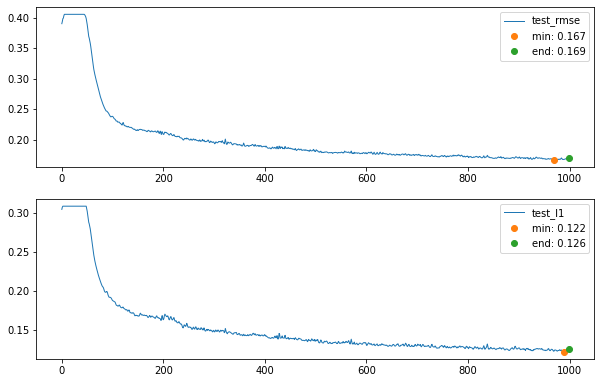

In [22]:
results_dS = 'concrete'
model_result = load_obj('./uci/test/'+results_dS+'/0/result')
obj = model_result
names = []
plotCurve(obj['curves'],keys=None,clip=True, label_min=True, label_end=True)
plt.savefig(results_dS+'_rmse_mae_Tweak.png')

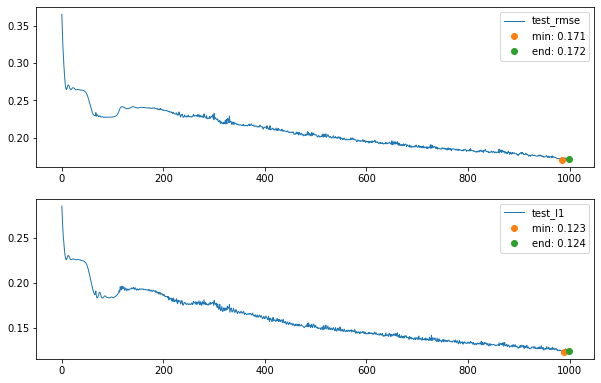

In [15]:
results_dS = 'concrete'
model_result = load_obj('./uci/test/'+results_dS+'/0/result')
obj = model_result
names = []
plotCurve(obj['curves'],keys=None,clip=True, label_min=True, label_end=True)
plt.savefig(results_dS+'_rmse_mae_noTweak.png')

# CORA

In [ ]:
!mkdir -p /content/GRAPE/uci/raw_data/reuters/
!cp -r /content/GRAPE/uci/raw_data/power/data /content/GRAPE/uci/raw_data/reuters/

In [ ]:
# !cp /content/data.txt /content/GRAPE/uci/raw_data/cora/data/data.txt # cora
!cp /content/reuters.txt /content/GRAPE/uci/raw_data/reuters/data/data.txt # reuters

In [ ]:
# !rm -r /content/GRAPE/uci/test/concrete/

In [ ]:
# import numpy as np
# df_np = np.loadtxt('/content/cora.txt')
# np.savetxt(fname='cora.txt',X=df_np[:df_np.shape[0]//20],delimiter='  ',fmt='%1.1f')

In [ ]:
# !rm -r /content/GRAPE/uci/test/cora/0/
# !rm -r /content/GRAPE/uci/raw_data/cora/data

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
# !rm -r /content/GRAPE/uci/test/cora/0/
# !rm -r /content/GRAPE/uci/test/reuters/0/
!python train_mdi.py --epochs 1000 uci --data reuters

Namespace(aggr='max', auto_known=False, concat_states=False, data='reuters', domain='uci', dropout=0.0, edge_dim=64, edge_mode=1, epochs=1000, gnn_activation='relu', impute_activation='relu', impute_hiddens='64', known=0.7, log_dir='0', loss_mode=0, lr=0.001, mode='train', model_types='EGSAGE_EGSAGE_EGSAGE', node_dim=64, node_mode=0, norm_embs=None, opt='adam', opt_decay_rate=0.9, opt_decay_step=1000, opt_restart=0, opt_scheduler='none', post_hiddens=None, save_model=False, save_prediction=False, seed=0, split_by='y', split_sample=0.0, split_test=False, split_train=False, train_edge=0.7, train_y=0.7, transfer_dir=None, transfer_extra='', valid=0.0, weight_decay=0.0)
GPU mem: 13, Select GPU 0
Using GPU 0
['EGSAGE', 'EGSAGE', 'EGSAGE'] [True, True, True] [64]
total trainable_parameters:  38
train edge num is 522258, test edge num is input 522258, output 223742
epoch:  0
loss:  1.1807082891464233
test rmse:  0.1413599847485482
test l1:  0.1244296282529831
epoch:  1
loss:  1.11366140842437

In [ ]:
# !rm -r /content/GRAPE/uci/test/cora/y0/
# !python train_y.py --epochs 1000 uci --data reuters

Namespace(aggr='max', concat_states=False, data='cora', domain='uci', dropout=0.0, edge_dim=16, edge_mode=1, epochs=1000, gnn_activation='relu', impute_activation='relu', impute_hiddens='', known=0.7, log_dir='y0', lr=0.001, model_types='EGSAGE_EGSAGE', node_dim=16, node_mode=0, norm_embs=None, opt='adam', opt_decay_rate=0.9, opt_decay_step=1000, opt_restart=0, opt_scheduler='none', post_hiddens=None, predict_hiddens='', seed=0, split_by='y', split_sample=0.0, split_test=False, split_train=False, train_edge=0.7, train_y=0.7, valid=0.0, weight_decay=0.0)
GPU mem: 13, Select GPU 0
Using GPU 0
['EGSAGE', 'EGSAGE'] [True, True] [16]
all y num is 135, train num is 95, test num is 40
epoch:  0
loss:  11.428316116333008
test rmse:  2.7705842290968197
test l1:  2.1144521236419678
epoch:  1
loss:  12.119220733642578
test rmse:  2.744665607450644
test l1:  2.100423574447632
epoch:  2
loss:  11.448323249816895
test rmse:  2.6987854627759087
test l1:  2.0754122734069824
epoch:  3
loss:  10.7507658

In [ ]:
# !rm -r /content/GRAPE/uci/mdi_results

In [ ]:
!python baseline_uci_mdi_all.py --domain uci --data cora

In [ ]:
# import torch
# import torch_sparse
# torch.version.cuda,torch.__version__,torch_sparse.__version__

# Reuters


In [ ]:
!wget https://raw.githubusercontent.com/sanujsriv/datasets/main/reuters.txt

In [ ]:
import torch
torch.cuda.empty_cache()
!mkdir -p /content/GRAPE/uci/raw_data/reuters/
!cp -r /content/GRAPE/uci/raw_data/power/data /content/GRAPE/uci/raw_data/reuters/
!cp /content/GRAPE/reuters.txt /content/GRAPE/uci/raw_data/reuters/data/data.txt

In [ ]:
!rm -r /content/GRAPE/uci/test/reuters/

In [ ]:
!python train_mdi.py --epochs 500 uci --data reuters

In [ ]:
!python train_y.py --epochs 500 uci --data reuters

Namespace(aggr='mean', concat_states=False, data='reuters', domain='uci', dropout=0.0, edge_dim=16, edge_mode=1, epochs=500, gnn_activation='relu', impute_activation='relu', impute_hiddens='', known=0.7, log_dir='y0', lr=0.001, model_types='EGSAGE_EGSAGE', node_dim=16, node_mode=0, norm_embs=None, opt='adam', opt_decay_rate=0.9, opt_decay_step=1000, opt_restart=0, opt_scheduler='none', post_hiddens=None, predict_hiddens='', seed=0, split_by='y', split_sample=0.0, split_test=False, split_train=False, train_edge=0.7, train_y=0.7, valid=0.0, weight_decay=0.0)
GPU mem: 13, Select GPU 0
Using GPU 0
['EGSAGE', 'EGSAGE'] [True, True] [16]
all y num is 500, train num is 338, test num is 162
epoch:  0
loss:  3.767347812652588
test rmse:  1.6101075514416645
test l1:  0.821763813495636
epoch:  1
loss:  3.471285104751587
test rmse:  1.5526545282143014
test l1:  0.8409058451652527
epoch:  2
loss:  3.260070562362671
test rmse:  1.498009553168359
test l1:  0.8627634048461914
epoch:  3
loss:  3.059692

In [ ]:
!python baseline_uci_mdi_all.py --domain uci --data reuters

# Citeseer

In [23]:
!mkdir -p /content/GRAPE/uci/raw_data/citeseer/
!cp -r /content/GRAPE/uci/raw_data/power/data /content/GRAPE/uci/raw_data/citeseer/

In [28]:
# !cp /content/data.txt /content/GRAPE/uci/raw_data/citeseer/data/data.txt # cora
!cp /content/citeseer.txt /content/GRAPE/uci/raw_data/citeseer/data/data.txt # reuters

In [ ]:
# !rm -r /content/GRAPE/uci/test/concrete/

In [ ]:
# import numpy as np
# df_np = np.loadtxt('/content/cora.txt')
# np.savetxt(fname='cora.txt',X=df_np[:df_np.shape[0]//20],delimiter='  ',fmt='%1.1f')

In [ ]:
# !rm -r /content/GRAPE/uci/test/cora/0/
# !rm -r /content/GRAPE/uci/raw_data/cora/data

In [29]:
import torch
torch.cuda.empty_cache()

In [36]:
!rm -r /content/GRAPE/uci/test/citeseer/0/
# !rm -r /content/GRAPE/uci/test/citeseer/0/
!python train_mdi.py --epochs 1000 uci --data citeseer

Namespace(aggr='mean', auto_known=False, concat_states=False, data='citeseer', domain='uci', dropout=0.0, edge_dim=64, edge_mode=1, epochs=1000, gnn_activation='relu', impute_activation='relu', impute_hiddens='64', known=0.7, log_dir='0', loss_mode=0, lr=0.001, mode='train', model_types='EGSAGE_EGSAGE_EGSAGE', node_dim=64, node_mode=0, norm_embs=None, opt='adam', opt_decay_rate=0.9, opt_decay_step=1000, opt_restart=0, opt_scheduler='none', post_hiddens=None, save_model=False, save_prediction=False, seed=0, split_by='y', split_sample=0.0, split_test=False, split_train=False, train_edge=0.7, train_y=0.7, transfer_dir=None, transfer_extra='', valid=0.0, weight_decay=0.0)
GPU mem: 13, Select GPU 0
Using GPU 0
['EGSAGE', 'EGSAGE', 'EGSAGE'] [True, True, True] [64]
total trainable_parameters:  26
train edge num is 258818, test edge num is input 258818, output 111482
epoch:  0
loss:  0.016340387985110283
test rmse:  0.10568271673258438
test l1:  0.04847600683569908
epoch:  1
loss:  0.01134780

In [31]:
# !rm -r /content/GRAPE/uci/test/citeseer/y0/
!python train_y.py --epochs 1000 uci --data citeseer

Namespace(aggr='max', concat_states=False, data='citeseer', domain='uci', dropout=0.0, edge_dim=16, edge_mode=1, epochs=1000, gnn_activation='relu', impute_activation='relu', impute_hiddens='', known=0.7, log_dir='y0', lr=0.001, model_types='EGSAGE_EGSAGE', node_dim=16, node_mode=0, norm_embs=None, opt='adam', opt_decay_rate=0.9, opt_decay_step=1000, opt_restart=0, opt_scheduler='none', post_hiddens=None, predict_hiddens='', seed=0, split_by='y', split_sample=0.0, split_test=False, split_train=False, train_edge=0.7, train_y=0.7, valid=0.0, weight_decay=0.0)
GPU mem: 13, Select GPU 0
Using GPU 0
['EGSAGE', 'EGSAGE'] [True, True] [16]
all y num is 50, train num is 38, test num is 12
epoch:  0
loss:  6.053258895874023
test rmse:  2.3810874823432626
test l1:  1.9532601833343506
epoch:  1
loss:  5.6986918449401855
test rmse:  2.875932459339258
test l1:  2.5329999923706055
epoch:  2
loss:  6.3205885887146
test rmse:  2.4903856418518
test l1:  2.0849082469940186
epoch:  3
loss:  5.53164339065

In [ ]:
# !rm -r /content/GRAPE/uci/mdi_results

In [ ]:
!python baseline_uci_mdi_all.py --domain uci --data citeseer

In [ ]:
# import torch
# import torch_sparse
# torch.version.cuda,torch.__version__,torch_sparse.__version__

# GRAPE Result


In [ ]:
#@title function : load / save pickle_obj
import pickle

def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [ ]:
# !mkdir - p ./results_all/cora

In [37]:
import os
from utils.plot_utils import plot_curve, plot_sample
import matplotlib.pyplot as plt
import numpy as np
log_path = './results_all/'

In [38]:
def plotCurve(data,keys=None,clip=True, label_min=True, label_end=True):
    if not keys:
        keys = data.keys()
    plt.figure(figsize=(10,10))
    for i,key in enumerate(keys):
        if key == 'train_loss':
          continue
        plt.subplot(len(keys),1,i+1)
        if clip:
            limit = 2*np.mean(np.abs(data[key]))
            y = np.clip(data[key],-limit,limit)
        else:
            y = data[key]
        plt.plot(y, linewidth=1.,label=key)
        if label_min:
            plt.plot(np.argmin(data[key]),np.min(data[key]),'o',
                    label="min: {:.3g}".format(np.min(data[key])))
        if label_end:
            plt.plot(len(data[key])-1,data[key][-1],'o',
                    label="end: {:.3g}".format(data[key][-1]))
        plt.legend()  


def plot_sample(data, plot_file, groups, num_points=20):
    plt.figure()
    for i,keys in enumerate(groups):
        plt.subplot(len(groups),1,i+1)
        for key in keys:
            interval = int(data[key].shape[0]/num_points)
            y = data[key][::interval]
            plt.plot(y, linewidth=1., label=key)
        plt.legend()
    plt.savefig(plot_file)
    plt.close()

def get_load_obj(baseline_name):
  return load_obj('/content/uci/mdi_results/results/'+baseline_name+'/'+results_dS+'/0/result')

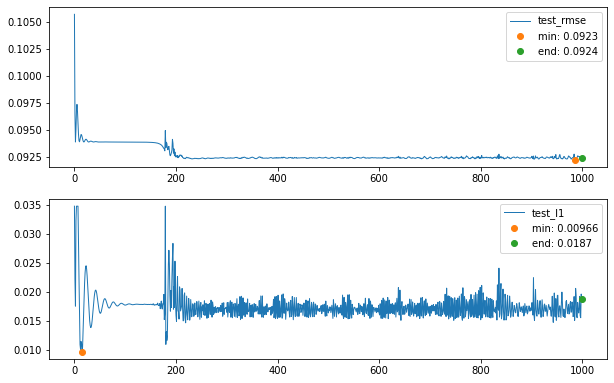

In [40]:
results_dS = 'citeseer'
model_result = load_obj('./uci/test/'+results_dS+'/0/result')
obj = model_result
names = []
plotCurve(obj['curves'],keys=None,clip=True, label_min=True, label_end=True)
plt.savefig(results_dS+'_rmse_mae.png')

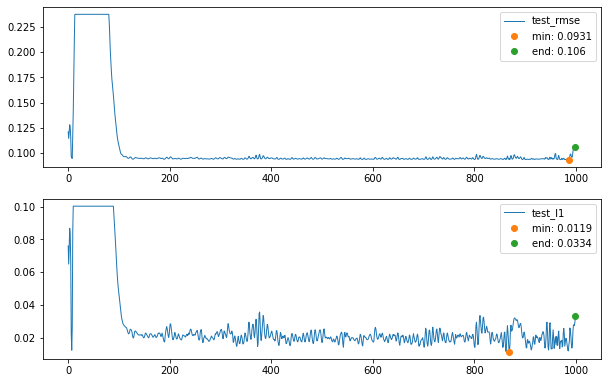

In [35]:
results_dS = 'citeseer'
model_result = load_obj('./uci/test/'+results_dS+'/0/result')
obj = model_result
names = []
plotCurve(obj['curves'],keys=None,clip=True, label_min=True, label_end=True)
plt.savefig(results_dS+'_rmse_mae.png')

In [ ]:
model_result = load_obj('uci/test/reuters/0/result')

def get_load_obj(baseline_name):
  return load_obj('/content/GRAPE/uci/mdi_results/results/'+baseline_name+'/reuters/0/result')

obj = model_result
names = []

plot_curve(obj['curves'], log_path+'curves.png',keys=None, 
                clip=True, label_min=True, label_end=True)
plot_curve(obj, log_path+'lr.png',keys=['lr'], 
            clip=False, label_min=False, label_end=False)
plot_sample(obj['outputs'], log_path+'outputs.png', 
            groups=[['final_pred_train','label_train'],
                        ['final_pred_test','label_test']
                        ], 
                num_points=20)

In [ ]:
baseline_models= ['knn_v1','mean_v1','spectral_v1']
for b in baseline_models:
  baseline = get_load_obj(b)
  print(b," (rmse) : ",baseline['rmse'])
  print(b," (mae) : ",baseline['mae'])
  print()

knn_v1  (rmse) :  0.09841960021394013
knn_v1  (mae) :  0.01808656016659661

mean_v1  (rmse) :  0.09843741368181144
mean_v1  (mae) :  0.029815063535138617

spectral_v1  (rmse) :  0.09470630243410195
spectral_v1  (mae) :  0.034051991033142846



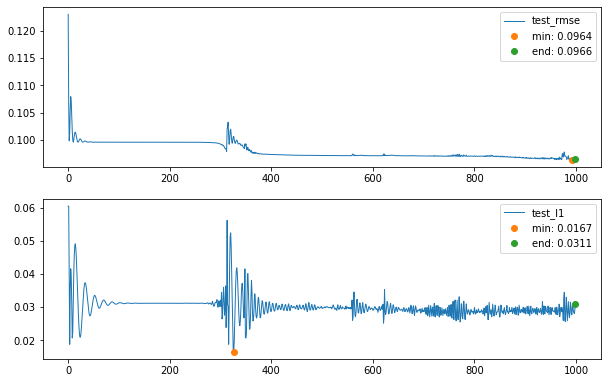

In [ ]:
plotCurve(obj['curves'],keys=None,clip=True, label_min=True, label_end=True)
plt.savefig('reuters_rmse_mae.png')

In [ ]:
!zip -r ./results_all_reuters.zip ./results_all_reuters/
!zip -r ./baseline_results_all.zip ./uci/mdi_results/results/
!zip -r ./model_results.zip  ./uci/test/reuters/

  adding: results_all_reuters/ (stored 0%)
  adding: results_all_reuters/lr.png (deflated 22%)
  adding: results_all_reuters/curves.png (deflated 5%)
  adding: results_all_reuters/outputs.png (deflated 5%)
updating: uci/mdi_results/results/ (stored 0%)
updating: uci/mdi_results/results/mean_v1/ (stored 0%)
updating: uci/mdi_results/results/mean_v1/cora/ (stored 0%)
updating: uci/mdi_results/results/mean_v1/cora/0/ (stored 0%)
updating: uci/mdi_results/results/mean_v1/cora/0/result.pkl (deflated 27%)
updating: uci/mdi_results/results/mice_v1/ (stored 0%)
updating: uci/mdi_results/results/mice_v1/cora/ (stored 0%)
updating: uci/mdi_results/results/mice_v1/cora/0/ (stored 0%)
updating: uci/mdi_results/results/spectral_v1/ (stored 0%)
updating: uci/mdi_results/results/spectral_v1/cora/ (stored 0%)
updating: uci/mdi_results/results/spectral_v1/cora/0/ (stored 0%)
updating: uci/mdi_results/results/spectral_v1/cora/0/result.pkl (deflated 26%)
updating: uci/mdi_results/results/knn_v1/ (stored 

In [ ]:
# !rm -r *.zip

In [ ]:
from google.colab import files
files.download("./results_all_reuters.zip")
files.download("./baseline_results_all.zip")
files.download("./model_results.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Saved Results

In [ ]:
#@title function : load / save pickle_obj
import pickle

def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

In [ ]:
# !unzip \*.zip 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
log_path = './results_all/'

In [ ]:
def plotCurve(data,keys=None,clip=True, label_min=True, label_end=True):
    if not keys:
        keys = data.keys()
    plt.figure(figsize=(10,10))
    for i,key in enumerate(keys):
        if key == 'train_loss':
          continue
        plt.subplot(len(keys),1,i+1)
        if clip:
            limit = 2*np.mean(np.abs(data[key]))
            y = np.clip(data[key],-limit,limit)
        else:
            y = data[key]
        plt.plot(y, linewidth=1.,label=key)
        if label_min:
            plt.plot(np.argmin(data[key]),np.min(data[key]),'o',
                    label="min: {:.3g}".format(np.min(data[key])))
        if label_end:
            plt.plot(len(data[key])-1,data[key][-1],'o',
                    label="end: {:.3g}".format(data[key][-1]))
        plt.legend()  


def plot_sample(data, plot_file, groups, num_points=20):
    plt.figure()
    for i,keys in enumerate(groups):
        plt.subplot(len(groups),1,i+1)
        for key in keys:
            interval = int(data[key].shape[0]/num_points)
            y = data[key][::interval]
            plt.plot(y, linewidth=1., label=key)
        plt.legend()
    plt.savefig(plot_file)
    plt.close()

def get_load_obj(baseline_name):
  return load_obj('/content/uci/mdi_results/results/'+baseline_name+'/'+results_dS+'/0/result')

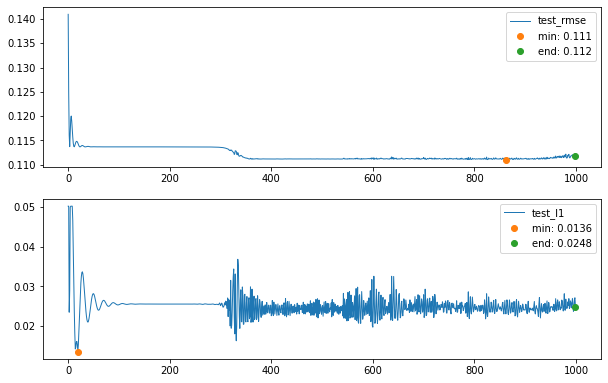

In [ ]:
results_dS = 'cora'
model_result = load_obj('./uci/test/'+results_dS+'/0/result')
obj = model_result
names = []
plotCurve(obj['curves'],keys=None,clip=True, label_min=True, label_end=True)
plt.savefig('reuters_rmse_mae.png')

In [ ]:
baseline_models= ['knn_v1','mean_v1','spectral_v1']
for b in baseline_models:
  baseline = get_load_obj(b)
  print(b," (rmse) : ",baseline['rmse'])
  print(b," (mae) : ",baseline['mae'])
  print()

knn_v1  (rmse) :  0.11788564081310879
knn_v1  (mae) :  0.016844841444685316

mean_v1  (rmse) :  0.1112887329707506
mean_v1  (mae) :  0.024244882729525376

spectral_v1  (rmse) :  0.11363695681410205
spectral_v1  (mae) :  0.02714794700048518

